This tutorial reproduces the results of Tutorial 12 on spinw.org. It is a triangular lattice antiferromagnet with easy plane anisotropy. 

Get Packages


In [1]:
using Sunny,GLMakie, CairoMakie

Define the lattice. Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. The magnetic atom is Cr3+ with spin = 3/2. The structure is incommensurate but by restricting the spins to a single plane, supercell method can be used to obtain the results. Size of supercell is (3,3,1).

In [2]:
a=3
b=3
c=4

latvecs = lattice_vectors(a, b, c, 90, 90, 120) 
positions=[[0, 0, 0]]
Cr = Crystal(latvecs,positions)
view_crystal(Cr)
print_symmetry_table(Cr,8)
sys=System(Cr, (3,3,1),[SpinInfo(1,S=3/2,g=2)], :dipole, seed=0)

Atom 1
Position [0, 0, 0], multiplicity 1
Allowed g-tensor: [A 0 0
                   0 A 0
                   0 0 B]
Allowed anisotropy in Stevens operators:
    c₁*𝒪[2,0] +
    c₂*𝒪[4,0] +
    c₃*𝒪[6,0] + c₄*𝒪[6,6]

Bond(1, 1, [1, 0, 0])
Distance 3, coordination 6
Connects [0, 0, 0] to [1, 0, 0]
Allowed exchange matrix: [A 0 0
                          0 B 0
                          0 0 C]

Bond(1, 1, [0, 0, 1])
Distance 4, coordination 2
Connects [0, 0, 0] to [0, 0, 1]
Allowed exchange matrix: [A 0 0
                          0 A 0
                          0 0 B]

Bond(1, 1, [1, 0, 1])
Distance 5, coordination 12
Connects [0, 0, 0] to [1, 0, 1]
Allowed exchange matrix: [A 0 D
                          0 B 0
                          D 0 C]

Bond(1, 1, [1, 2, 0])
Distance 5.1961524227066, coordination 6
Connects [0, 0, 0] to [1, 2, 0]
Allowed exchange matrix: [A 0 0
                          0 B 0
                          0 0 C]

Bond(1, 1, [2, 0, 0])
Distance 6, coordination 6
Co

System [Dipole mode]
Lattice (3×3×1)×1
Energy per site 0


Set up the exchanges and the Hamiltonian. Here easy plane anisotropy needs to be provided to restrict the spins to a plane. Providing a positive value to D can achieve this. Anisotropy can be achieved using "set_onsite_coupling!". Randomize the spins and then minimize the energy. 

In [3]:
J1=1
D=0.2
set_exchange!(sys,J1,Bond(1, 1, [1, 0, 0]))
S=spin_operators(sys,1)
set_onsite_coupling!(sys,D*S[3]^2,1)
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)
energy(sys)

┌ Warning: `spin_operators` will soon be removed! Use `spin_matrices(spin_label(sys, i))` instead.
└ @ Sunny /Users/bhushanthipe/.julia/packages/Sunny/Kmqzx/src/deprecated.jl:10


-29.025

Create the LSWT object and set up a path. Obtain the dispersion and intensity bands.

In [4]:
q_points=[[0,0,0],[1, 1, 0]]
density = 50
path, xticks = reciprocal_space_path(Cr, q_points, density);
swt=SpinWaveTheory(sys)
formula = intensity_formula(swt, :perp; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path, formula);

Plot the dispersion band and convoluted spectra

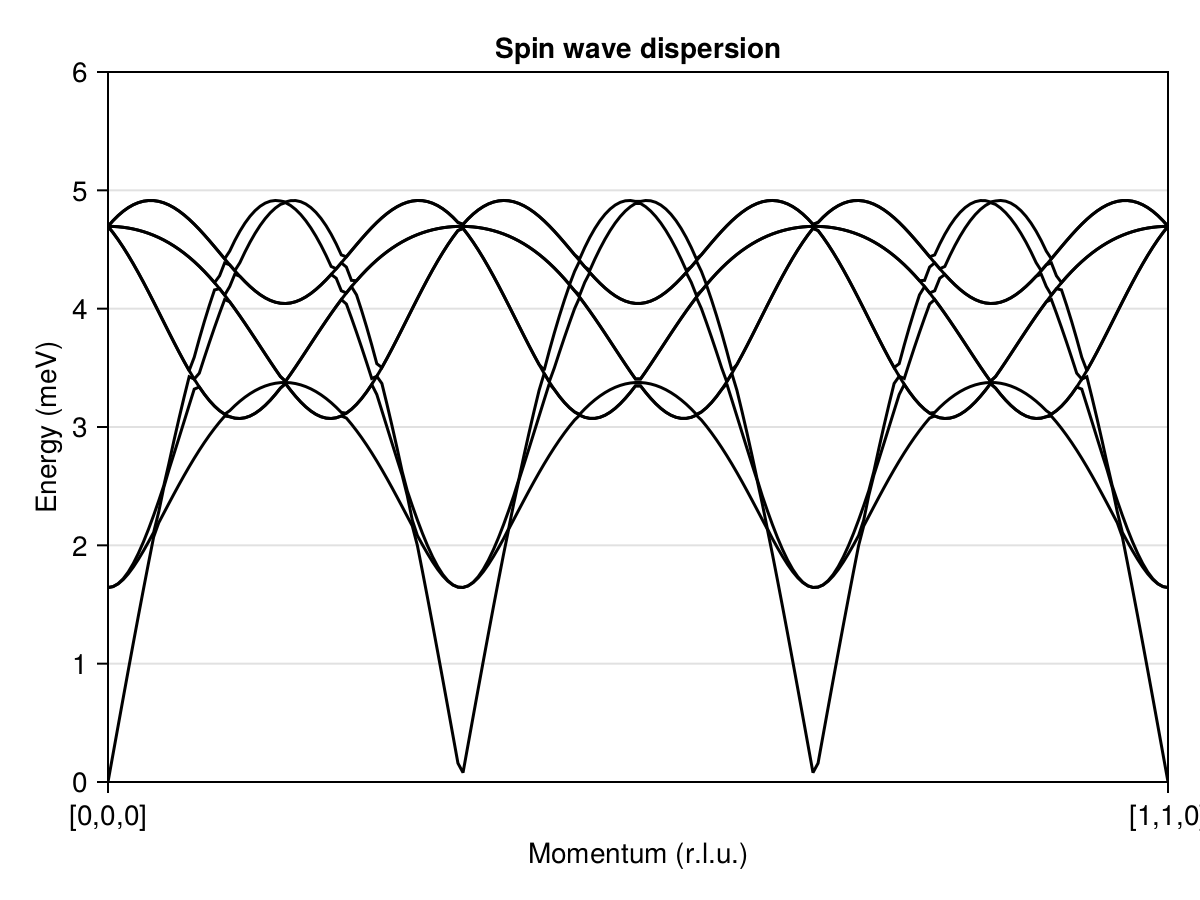

In [5]:
CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="Energy (meV)", title="Spin wave dispersion",xticks)
ylims!(ax, 0.0, 6)
xlims!(ax, 1, size(disp, 1))
colorrange = extrema(intensity)
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color="black", colorrange)
end
fig

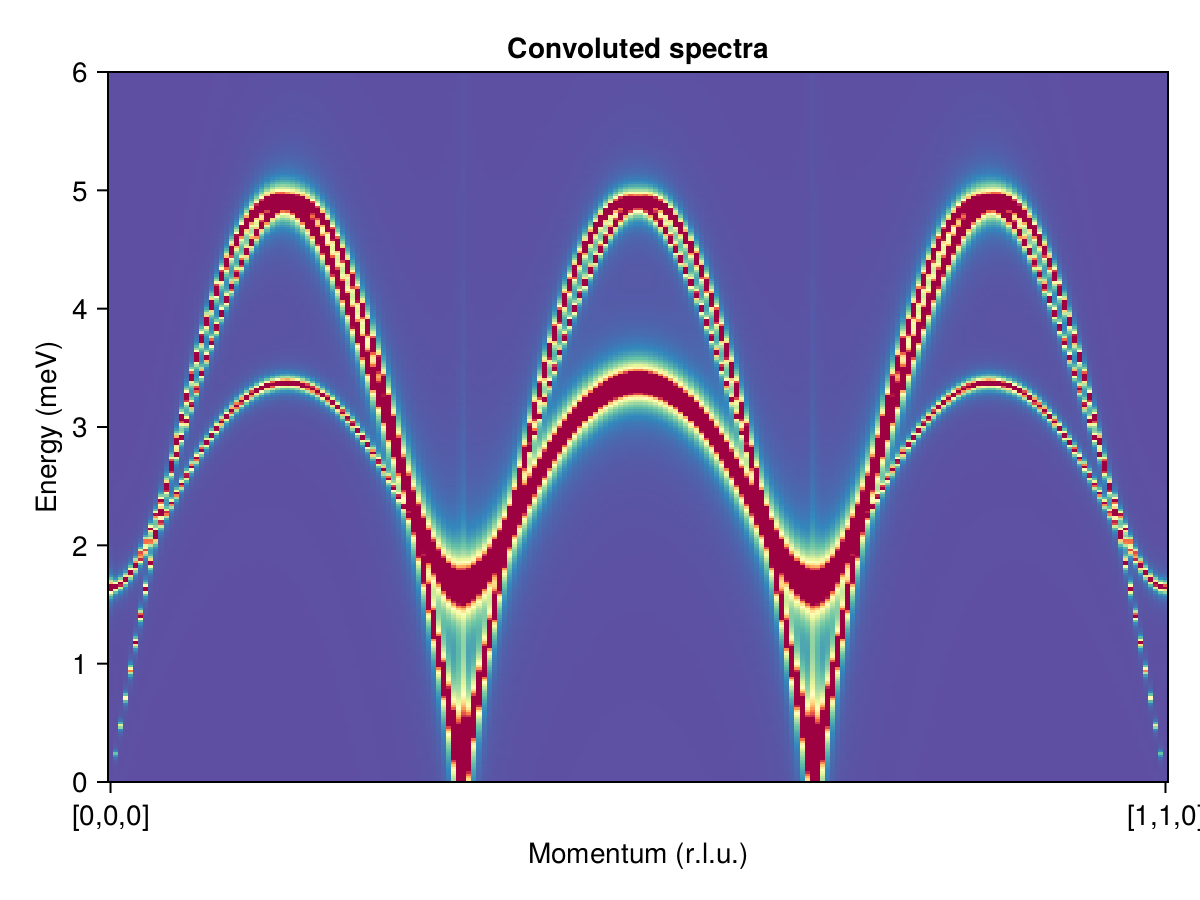

In [6]:
γ = 0.02 
broadened_formula = intensity_formula(swt, :perp; kernel=lorentzian(γ))
energies = collect(0:0.02:10) 
is = intensities_broadened(swt, path, energies, broadened_formula);
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="Energy (meV)", title="Convoluted spectra",xticks)
ylims!(ax, 0.0, 6.0)

pl=heatmap!(ax, 1:size(is, 1), energies, is,colorrange=(0,1))
pl.colormap = Reverse(:Spectral)
fig